In [1]:
## Dawit Belayneh; Intro to QuTip Via Jaynes-Cummings Model
## for cavity rydbergs 

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

# making a basic qubit (2-level states)

spin_down = basis(2,0)
spin_up = sigmax() * spin_down
#print(spin_up)
#print(spin_down)

In /home/dawit/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dawit/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dawit/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/dawit/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dawit/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

Text(0.5, 0, 'Time')

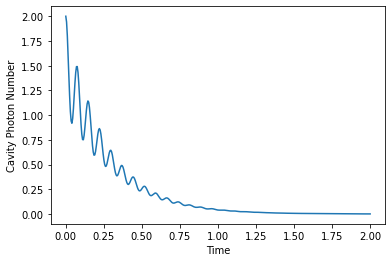

In [2]:
# JC stuff 
# example: decay and exchange of 'photon_init' photons between cavity and atom
# some parameters 

# coupling stregth 
g = 30
#
kappa = 1.4
gamma = 6
cav_exc_max = 5 # max num of excited cavity photons 
prb = 0.2 # probing frequency (photon freq) 
phot_init = 2 # num of photons in EM bath at start 


# Hilbert Space of cavity and atom 
# and some init ground sates 
cav0 = basis(cav_exc_max, n=phot_init) # 
qubit0 = sigmam()*basis(2, 0) # ground state qubit
# this works because qupit implements 
# sigma_minus * spin_down = spin_down
psi0 = tensor([cav0, qubit0]) # |n=2; spin_down >

#print(cav0)
#print(qubit0)
#print(psi0) ??? How does the indexing work here??? 

# useful operators 
a = tensor(destroy(cav_exc_max), qeye(2)) # cavity annihilation
drive = (a.dag() + a) # drives cavity at given freq 
qubit_excitations = tensor(qeye(cav_exc_max), (sigmaz()+1)/2)
# does this just count excited states  

exchange = (tensor(create(cav_exc_max), sigmam())); # atom gives up photon
exchange = exchange+exchange.dag(); # full exchange 
# exchange.dag() : atom absorbs photon

# Hamiltonian 
# g is coupling between field and atom
H = prb*drive + g*exchange 
# ??? what does prb*drive do?
# drive|n> = |n+1> + |n-1>


# list of collapse operators [cavity decay, atomic decay]
# gamma controls atomic decay rate 
# kappa controls photonic decay rate 
c = [np.sqrt(kappa)*tensor(destroy(cav_exc_max), qeye(2)), np.sqrt(gamma)*tensor(qeye(cav_exc_max), sigmam())]
# These operators define dissapation process
# They are ops that couple system to environment


# basic numbers and plots 
times = np.linspace(0.0, 2.0, 400)

# me: master equation
result = mesolve(H, psi0, times, c, [a.dag()*a])
# note that a.dag()*a the photon number op.
# result computes expec value of num_op
 
# options(Hamiltonian,
# intial ket of density matrix,
# list of times for t,
# collapse ops, 
# list of ops to get expectation value of)

fig, ax = plt.subplots()
ax.plot(times, result.expect[0])
# looks like expec values are returned in a list 
plt.ylabel('Cavity Photon Number')
plt.xlabel('Time')

# if a closed JC system Cavity Photon Number 
# would oscillate between 2 and 1 via Rabi Oscillation
# ~ sine squared oscillation.
# exp supression comes from dissapation.

# How do I tell if the system is at resonance or not? 
# what is the natural freq of cavity and atom? 

/home/dawit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: ComplexWarning: Casting complex values to real discards the imaginary part


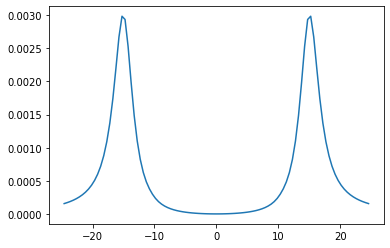

In [3]:
# Vaccum Rabi Splitting,
# assuming cav-atom resonance 

# parameters 
g=15
kappa = 1.4
gamma = 6
prb = 0.2
npts = 101

nphot = np.empty(npts)
deltas = np.linspace(1.5*(-g-kappa), 1.5*(g+kappa), npts)
for i, delta in enumerate(deltas, start=0):
    # Hamiltonian 
    H = prb*drive + g*exchange + delta*(a.dag()*a + qubit_excitations)
    # Hamiltonian detunes probe from excitations
    # note that cav-photons and atomic excitations have 
    # the same energy delta (cause @ resonance) 
    # since prb ~ 0, delta is the difference b/n cav-phot / atom
    # energy. 
    # scanning delta values is same as scanning for resonance energy
    
    # QUESTION: what happens if we remove qubit_excitations
    
    # collapse ops [cavity_decay, atomic_decay]
    c = [np.sqrt(kappa)*tensor(destroy(cav_exc_max), qeye(2)), 
         np.sqrt(gamma)*tensor(qeye(cav_exc_max), sigmam())]
    
    rho_ss = steadystate(H, c, method='direct')
    # steadystate density matrix 
    nphot[i] = np.trace(a.dag()*a*rho_ss) 
    # expectation of num operator for each delta value 
    
    # nphot[i] is expected intracavity photon number 
    
fig = plt.figure()
plt.plot(deltas, nphot)
# x-axis: deltas 
# y-axis: nphot 

**Where Does the Vaccum Rabi Splitting come from?**

*VRS is an effect that becomes prominent **when the coupling between cavity and atom is dominant**. Then, the eigenstates of our system ($H_{JC}$) are no longer the cavity egenstate and atom eigenstates. They are linear supperpositions of the form:* 

$$|n, down\rangle \pm |n-1, up\rangle$$ 

*up to a constant **when cavity and atom are at resonance**.*

The code above searches for the energies of the g(exchange) term as they are the steadystate solutions. We see a peak in photon number at those energy values (when delta coincides with the energies). This is because the above linear combinations become eigenstates of the delta(a.dag()a + qubit_excitation) term when the following are satisfied: 

* n is large enough that n-1 is roughly n, and
* delta coincides with the energies of g(exchange) operator 

In [4]:
# compute the prob of state up as a function of time given
# initial state of cavity-atom is coherent state and down

# should observe Rabi -> collapse -> revival -> high non-linearity
# at times roughly T_rabi, T_collapse, T_revival
# count difference in time in units of rabi cycles 

# To do this figure out how to find projection of psi_t on to 
# sum_{n} |n, up> (QuTip thing)

/home/dawit/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'g=150 | $\\kappa$=1.4 | $\\Gamma$=3 | PrbPwr=0.1')

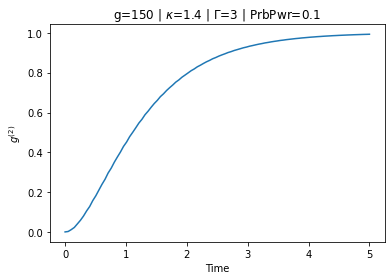

In [5]:
# g2 stuff 
# g2: "probe" on VRS peak, look for g2 suppression

max_time = 5.0
time_steps = 100
# probe on VRS peak:
g= 150 # high non linearity peaks ~ +-g
kappa = 1.4
gamma = 3
prb = 0.1
npts = 101
delta = g # NOTE: i.e at peaks??

# array of times for calculating evolution after a photon was detected
times = np.linspace(0.0, max_time, time_steps)

# Hamiltonian 
H = prb*drive + g*exchange + delta*(a.dag()*a + qubit_excitations)
# Note that g = delta 

# list of collapse operators [cavity decay, atomic decay]
c = [np.sqrt(kappa)*tensor(destroy(cav_exc_max), qeye(2)), 
     np.sqrt(gamma)*tensor(qeye(cav_exc_max), sigmam())]

# prepare options for mesolver to not tidy up small values
# we don't want to loose small numbers 
options = Options(tidy=False)

# calculate steady-state (SS) solution, i.e approx eigenstates of H
rho_ss = steadystate(H, c, method='direct')

#claculate time evolution after removing a photon from SS
rho_m1 = a * rho_ss * a.dag() # remove one photon from SS
norm = np.trace(rho_m1) # normalization factor 
rho_m1 = a * (rho_ss / norm) * a.dag() # renormalize SS
rho_m1_t = mesolve(H, rho_m1, times, c, [a.dag()*a], options=options)
# time evolve renormalized state 
# and extract <N> , num op


# build g2
num = rho_m1_t.expect[0] * norm  
den = np.power(np.trace(a.dag()*a*rho_ss), 2)


g2 = num/den 


# matplotlib
fig=plt.figure()
plt.plot(times, g2)   
plt.xlabel('Time')
plt.ylabel('$g^{(2)}$')
plt.title('g='+str(g) + ' | $\kappa$=' + str(kappa) + ' | $\Gamma$=' + str(gamma) + ' | PrbPwr=' + str(prb))

**$g{(2)}$ between steady-state solution of JC and steady-state with one less photon @ cavity-atom resonance**

*If the steady state solution was a coherent state, we would have see $g^{(2)}(t) = 1$ as $a \rho_{ss} a^{\dagger} = \rho_{ss}$ for a coherent state.*

*Since it takes some finite amount of time for the $g^{(2)}$ to be 1 we see that $\rho_{ss}$ is not a simple coherent state.*


*The dependence of $g^{(2)}(t)$ on the coupling parameter is intersting:*
* small g sees the curve fliping and oscillating wildly on its way to 1
* medium g sees the curve with a log trend up to 1 with small oscillating features along the curve **Q: why is g(0) = 0?** 
* high g see the oscillations die out (no new features appear after some high enough g value)

**Q: How good is $g^{(2)}(t)$ at indentifyig if $\rho_{ss}$ is a coherent state?**

**Example: $H = N = a^\dagger a$ with $|\psi_i\rangle = |n\rangle$**

Since $[H, N] = 0, N(t) = N(0) = N.$ Then, $g^{(2)}(t)$ is given by: 

$$g^{(2)}(t) = \frac{Tr(N \rho_{n-1})}{Tr(N \rho_n)^2} = 1 - \frac{1}{n}.$$

For $n = 1, g = 0$ but for a coherent state $g = 1$. So, $$0 = g^{(2)}_{n = 1}(t) \le g^{(2)}(t) \le g^{(2)}_{coh}(t) = 1$$

**I am actually not sure if 1 is the $g^{(2)}(t)$ upper limit.**

/home/dawit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:36: ComplexWarning: Casting complex values to real discards the imaginary part


Text(0, 0.5, '$g^{(2)}$')

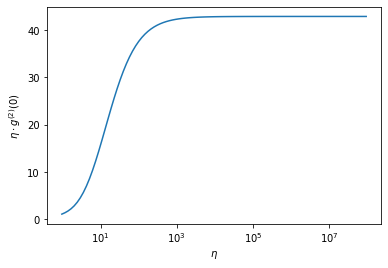

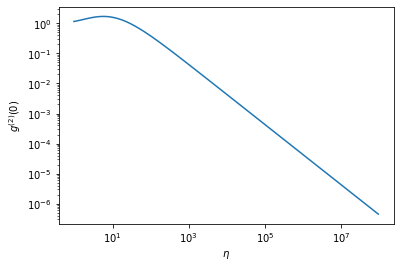

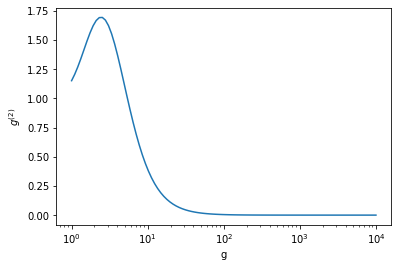

In [6]:
# what is g2(0) as a function of the co-operativity?

# What does co-operativity measure?

# g2: "probe" on VRS peak, look for g2 supression 
# probe on VRS peak:

max_time = 5.0

gexp = np.linspace(0.0, 4.0, 100)
g = 10**gexp # log scaled g values 
kappa = 1.4
gamma = 3
prb = 0.2
delta = g # always probing VRS peak, delta is now list

# array of times for calculating evolution after a photon
# was removed.
tiems = np.linspace(0.0, max_time, time_steps)

g2 = 0*g # list of zeros as of now 
for i, thisg in enumerate(g):
    H = prb*drive + thisg*exchange + delta[i]*(a.dag()*a + qubit_excitations)
    # list of collapse operators [cavity decay, atomic decay]
    c = [np.sqrt(kappa)*tensor(destroy(cav_exc_max), qeye(2)), 
         np.sqrt(gamma)*tensor(qeye(cav_exc_max), sigmam())]
    
    # calculate steady state 
    rho_ss = steadystate(H, c, method='direct')
    # calculate g2(0)
    rho_m1 = a * rho_ss * a.dag()
    norm = np.trace(rho_m1)
    rho_m1 = a * (rho_ss / norm) * a.dag()
    num = np.trace(a.dag()*a*(rho_m1 * norm))
    den = np.power(np.trace(a.dag()*a*rho_ss), 2)
    g2[i] = num/den 
    
# we just computed the g2 values for a various values of g 
# @ VRS peak, that is @ deta = g.

fig10 = plt.figure()
eta = 4*g**2/kappa/gamma # what is eta (list of values)?
plt.semilogx(eta, g2*eta) # semilogx : x-axis is log val 
plt.ylabel('$\eta \cdot g^{(2)}(0)$')
plt.xlabel('$\eta$')

fig20 = plt.figure()
eta = 4*g**2/kappa/gamma
plt.loglog(eta, g2) # loglog : x,y-axis log vals 
plt.ylabel('$g^{(2)}(0)$')
plt.xlabel('$\eta$')

fig=plt.figure()
plt.semilogx(g, g2)   
plt.xlabel('g')
plt.ylabel('$g^{(2)}$')

* The second plot shows for high $\eta = \frac{4g^2}{\kappa \gamma},$ values, that is for high $g$ values, $g^{(2)}(0) \rightarrow 0$ which is characterstic of photon anti-bunching. Thus, high coupling values ($g$) force a QM description of the cavity light. Note that it is also non-coherent light.

* The 3rd plot is interesting for small values of $g$. Why is there a peak beween the $10^0$ and $10^1$ range? 

rho_ss:  Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[5.64688632e-22+0.00000000e+00j 0.00000000e+00+0.00000000e+00j
  0.00000000e+00+2.05547880e-24j 0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j 9.99981633e-01+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j 0.00000000e+00+4.28555686e-03j]
 [0.00000000e+00-2.05547880e-24j 0.00000000e+00+0.00000000e+00j
  2.72067820e-27+0.00000000e+00j 0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j 0.00000000e+00-4.28555686e-03j
  0.00000000e+00+0.00000000e+00j 1.83666722e-05+0.00000000e+00j]] 
--------
rho_m1:  Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]] 
--------
g2(0):  0j


/home/dawit/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, ' | $\\kappa$=1.4 | $\\Gamma$=3 | PrbPwr=0.003')

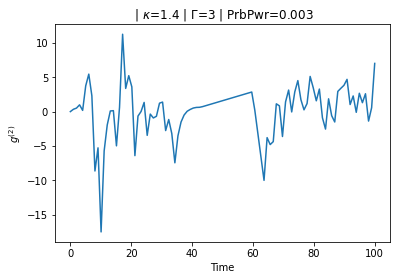

In [26]:
# g2 for probe laser

cav_exc_max = 2 # max num of excited cavity photons 
prb = 0.003 # probing frequency (photon freq) 
phot_init = 0 # num of photons in EM bath at start 

max_time = 100
time_steps = 100
kappa = 1.4
gamma = 3

# Hilbert Space of cavity and atom 
cav0 = basis(cav_exc_max, n=phot_init)
qubit0 = sigmam()*basis(2, 0) 
psi0 = tensor([cav0, qubit0])

# useful operators 
a = tensor(destroy(cav_exc_max), qeye(2)) # cavity annihilation
drive = (a.dag() + a) # drives cavity at given freq 
qubit_excitations = tensor(qeye(cav_exc_max), (sigmaz()+1)/2)
# does this just count excited states  

# array of times for calculating evolution after a photon was detected
times = np.linspace(0.0, max_time, time_steps)

# Hamiltonian 
H = prb*drive

# list of collapse operators [cavity decay, atomic decay]
c = [np.sqrt(kappa)*tensor(destroy(cav_exc_max), qeye(2)), 
     np.sqrt(gamma)*tensor(qeye(cav_exc_max), sigmam())]

# prepare options for mesolver to not tidy up small values
# we don't want to loose small numbers 
options = Options(tidy=False)

# calculate steady-state (SS) solution, i.e approx eigenstates of H
rho_ss = steadystate(H, c, method='direct')

# test a coherent state 
# rho_ss = tensor(coherent_dm(cav_exc_max, 1), qeye(2)) 

#claculate time evolution after removing a photon from SS
print('rho_ss: ', rho_ss, '\n--------')
rho_m1 = a * rho_ss * a.dag() # remove one photon from SS
norm = np.trace(rho_m1) # normalization factor 
rho_m1 = a * (rho_ss / norm) * a.dag() # renormalize SS
print('rho_m1: ', rho_m1, '\n--------')
rho_m1_t = mesolve(H, rho_m1, times, c, [a.dag()*a], options=options)

# build g2
num = rho_m1_t.expect[0] * norm  
den = np.power(np.trace(a.dag()*a*rho_ss), 2)

# g2 = num/den 
g2  = coherence_function_g2(H, rho_ss, times, c, a)[0] # return normalized g2
print('g2(0): ', g2[0])

# matplotlib
fig=plt.figure()
plt.plot(times, g2)   
plt.xlabel('Time')
plt.ylabel('$g^{(2)}$')
plt.title(' | $\kappa$=' + str(kappa) + ' | $\Gamma$=' + str(gamma) + ' | PrbPwr=' + str(prb))

**g2 is close to 1 for $a + a^\dagger$ as expected.**

*Notice that $H = a$ operator by itself is not a hermitian operator and therfore
does not give unitary time evolution. A coherent state $|\lambda\rangle$ is an eigenstate of $H = a$.*

**Is it possible to get a coherent light steady-state solution for a hermitian hamiltonian?**
**Relatedly, is it possible to get $g^{(2)} = 1$ out of a hermitian QM hamiltonian?**